In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import random

In [2]:
X, y = make_regression(n_samples=100, n_features=1, noise=80, random_state=42)

In [3]:
X.shape

(100, 1)

In [4]:
y.shape

(100,)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(X, y)

LinearRegression()

In [8]:
lr.coef_

array([63.30965773])

In [9]:
lr.intercept_

9.320922564215781

In [13]:
class StochasticGD:
    def __init__(self, learning_rate, epochs):
        self.lr = learning_rate
        self.epochs = epochs
        self.coef_ = None
        self.intercept_ = 0

    def fit(self, X, y):
        no_of_columns = X.shape[1]
        gradient_for_beta_i = np.zeros(no_of_columns)
        self.coef_ = np.ones(no_of_columns)
        gradient_for_beta_o = 0
        for i in range(self.epochs):
            random_row = random.randint(0, X.shape[0])
            y_pred = (self.coef_ * X[random_row]) + self.intercept_
            for i in range(no_of_columns):
                gradient_for_beta_i[i] = (-2) * np.sum((y[random_row] - y_pred) * X.T[i])
                self.coef_[i] = self.coef_[i] - (self.lr * gradient_for_beta_i[i])
            gradient_for_beta_o = (-2) * np.sum(y[random_row] - y_pred)
            self.intercept_ = self.intercept_ - (self.lr * gradient_for_beta_o)
        return self.coef_, self.intercept_

    def predict(self, X):
        return (self.coef_ * X) + self.intercept_

In [184]:
gd = StochasticGD(0.01, 25)

In [188]:
gd.fit(X, y)

(array([-40.7870742]), 0.21818712158185316)

In [189]:
print(lr.coef_, lr.intercept_)

[63.30965773] 9.320922564215781


In [190]:
y_pred = gd.predict(X)

In [191]:
import matplotlib.pyplot as plt

In [192]:
lr_pred = lr.predict(X)

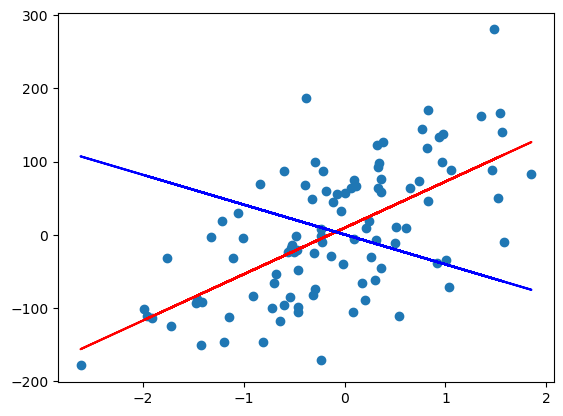

In [193]:
plt.scatter(X, y)
plt.plot(X, lr_pred, color="red")
plt.plot(X, y_pred, color="blue")